# Plan for today:
* [THEORY] Overview of single qubit gates
* [THEORY] Qubit state representation on Bloch sphere
* [Qiskit] Analyzing and visualizing qubit state and operations on qubit
* [THEORY] Qubit state measurement
* [THEORY] Overview of 2-qubit gates. Multi-qubit gates
* [Qiskit] Analyzing multi-qubit states. Statevectors and operators.
* [Qiskit] Other visualizations in Qiskit
* Homework

## Qubit state representation on a Bloch sphere

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from math import sqrt, pi
%matplotlib inline

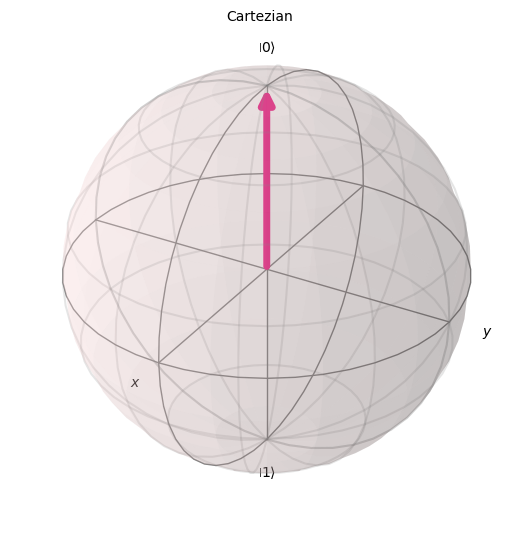

In [2]:
plot_bloch_vector([0,0,1], title="Cartezian") # Cartezian coordinates are the default

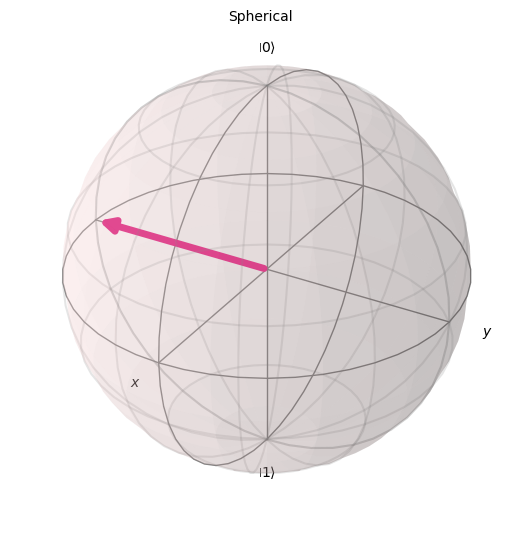

In [3]:
plot_bloch_vector([1,pi/2,3*pi/2], title="Spherical", coord_type='spherical') # [r,theta,phi]

In [4]:
qc = QuantumCircuit(1)
initial_state = [0,1]   # Define initial_state as |1>. Must be normalized!!!
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.h(0)
qc.draw()

┌─────────────────┐┌───┐
q: ┤ Initialize(0,1) ├┤ H ├
   └─────────────────┘└───┘

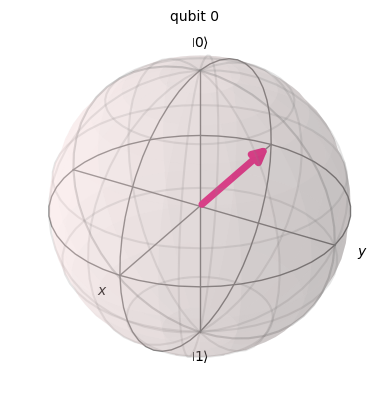

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## Exercise 3.1
Use plot_bloch_vector() to visualize a qubit in the state: $\frac{1}{\sqrt{2}}(|0> - i|1>)$

### Animation of applying single qubit gates on Bloch sphere

* circuit needs to be just one qubit circuit
* spg = seconds per gate
* fpg = frames per gate
* trace - boolean if intermediate positions should be marked with dots

In [6]:
from qiskit.visualization import visualize_transition
from qiskit import *

qc = QuantumCircuit(1)
qc.h(0)

visualize_transition(qc, fpg=40, spg=2, trace=True)

## Exercise 3.2
Using visualize_transition() function show that X = HZH

## Analyzing qubit state using qiskit (do not confuse with measurement)

```
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
statevector = job.get_statevector(qc)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
```

In [7]:
# the Statevector object allows us to analyze the state of the quantum circuit (without measurement)

qc = QuantumCircuit(1)
qc.h(0)

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend).result()

statevector = job.get_statevector(qc)

print(statevector[0])
print(statevector[1])

print(statevector[0].real**2)
print(statevector[1].real**2)

(0.7071067811865476+0j)
(0.7071067811865476+0j)
0.5000000000000001
0.5000000000000001


In [8]:
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [9]:
qc = QuantumCircuit(1)
qc.h(0)

state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

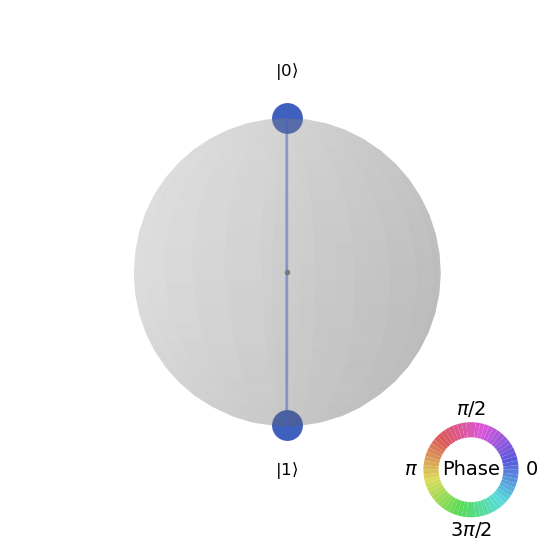

In [10]:
state.draw('qsphere')

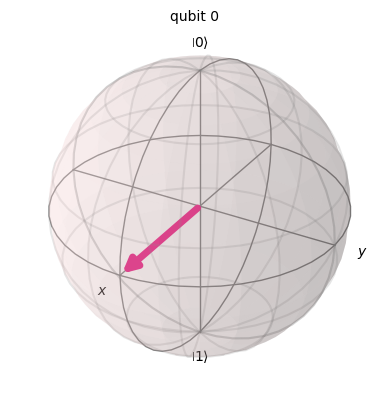

In [11]:
state.draw('bloch')

## Exercise 3.3
Visualize on QSphere the state HX|0>.
Analyze the phase information.

## Exercise 3.4
Using Qiskit, create a qubit in such state that, if measured, would with probability 1/3 give value 0 and with probability 2/3 value 1. Prove that state of your qubit fulfills the above requirement.

## Qubit state measurement

Theoretical inroduction.

We can measure the qubit state by projecting onto any direction going through middle of Bloch sphere.
But we have measurements alond X, Y and Z as the only three independent 'basic' measurements.

Physically IBM's quantumcomputers can measure along Z axis, but we can map any axis onto Z-axis and then measure.

Measuring a qubit also results in the destruction of quantum entanglement for that qubit

# Exercise 3.5
Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩

# Exercise 3.6
Use Qiskit to display the probability of measuring a |0⟩ qubit in the Y-basis

## Multi-qubit states representation

In [19]:
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend).result()

state = job.get_statevector(qc)

array_to_latex(state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [25]:
qc = QuantumCircuit(3)
qc.h(0)
qc.draw()

state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

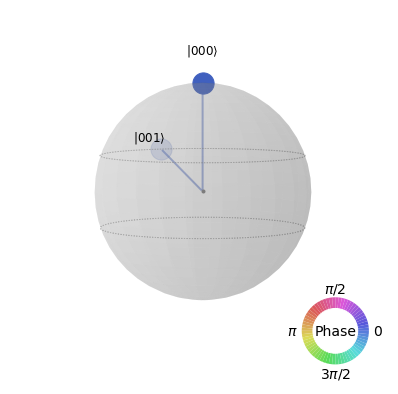

In [26]:
state.draw('qsphere')

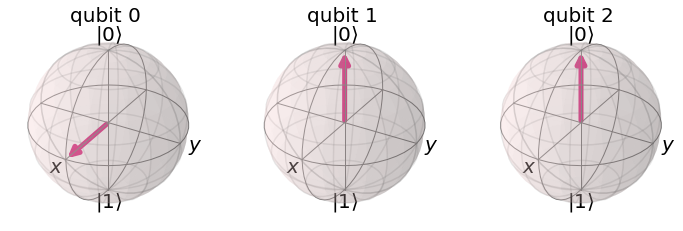

In [27]:
state.draw('bloch')

# Exercise 3.7
Visualize on QSphere and Bloch sphere the Bell state of 2 qubits.
How do you interpret the results?

## Getting matrix representation of quantum gates:

In [49]:
from qiskit.quantum_info import Operator

U = Operator(qc)

# Show the results
print(U.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


In [51]:
from qiskit.visualization import array_to_latex
array_to_latex(U.data)

<IPython.core.display.Latex object>

In [13]:
qc = QuantumCircuit(2)
qc.h(0)

state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

# Exercise 3.8
Using Qiskit show matrix representation for CNOT.
How the matrix representation changes when you reverse control and target qubits?

# Creating custom gates

In [72]:
my_circuit = QuantumCircuit(3, name="My gate")
my_circuit.cx(0,1)
my_circuit.cx(1,2)
my_circuit.cx(0,1)
my_circuit.cx(1,2)

my_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

In [73]:
my_gate = my_circuit.to_instruction()

In [74]:
new_circuit = QuantumCircuit(4)

new_circuit.append(my_gate, [0,1,2])

new_circuit.draw()

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1 My gate ├
     │          │
q_2: ┤2         ├
     └──────────┘
q_3: ────────────

## Homework: 
Do all the below on paper and bring it in 'hard copy' for the next class ;)
* Prove that points on opposite sites of Bloch sphere represent orthogonal quantum states. Explain why they are not geometrically orthogonal.
* Derive the most generic form of single qubit state with Bloch sphere angles.
* Prove that $\frac{1}{2}(1+\vec{\sigma_A}\vec{\sigma_B})$ represents a SWAP gate

Read (or watch the video of Jay Gambetta - it's at the end of teh page) the blog post on utility scale quantum computing: https://research.ibm.com/blog/100-qubit-utility?sf183103802=1